In [1]:
###IMPORTS#############################################
import os, sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks
from sklearn.metrics import mean_squared_error
#######################################################

In [2]:
bot_state_dir = os.getcwd() + "\\mavic_state6_wTuned.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state7.csv"
#bot_state_dir = os.getcwd() + "\\mavic_state8.csv"

print(bot_state_dir)

# use for mavic_state4.csv
# cols = ['x_pos', 'y_pos', 'z_pos', 
#        'roll_rot', 'pitch_rot', 'yaw_rot', 
#        'x_vel', 'y_vel', 'alt_vel',
#        'x_acc', 'y_acc', 'alt_acc',
#        'roll_vel', 'pitch_vel', 'yaw_vel',
#        'timestep',
#        'front_left_motor', 'front_right_motor',
#        'rear_left_motor', 'rear_right_motor']

cols = ['x_pos', 'y_pos', 'z_pos', 
       'roll_rot', 'pitch_rot', 'yaw_rot', 
       'x_vel', 'y_vel', 'alt_vel',
       'x_acc', 'y_acc', 'alt_acc',
       'roll_vel', 'pitch_vel', 'yaw_vel',
       'timestep',
       'tgt_waypt_err']

bot_stateDF = pd.read_csv(bot_state_dir, names=cols)
print(bot_stateDF.shape)
print(bot_stateDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\mavic_state6_wTuned.csv
(9618, 17)
         x_pos         y_pos     z_pos  roll_rot  pitch_rot       yaw_rot  \
0    -0.005625 -5.900385e-08  0.115662  0.000002  -0.069871 -1.735217e-07   
1    -0.005625 -5.764667e-08  0.115662  0.000002  -0.069872 -1.718920e-07   
2    -0.005625 -5.743479e-08  0.115662  0.000002  -0.069872 -1.715229e-07   
3    -0.005625 -5.788793e-08  0.115662  0.000002  -0.069873 -1.719056e-07   
4    -0.005625 -5.869216e-08  0.115662  0.000002  -0.069873 -1.727044e-07   
...        ...           ...       ...       ...        ...           ...   
9613  0.504640  1.050336e-01  3.003911 -0.002732  -0.040996 -3.139624e+00   
9614  0.497697  1.057761e-01  3.003848 -0.003031  -0.039895 -3.137615e+00   
9615  0.490851  1.065077e-01  3.003737 -0.003341  -0.038059 -3.135608e+00   
9616  0.484103  1.072300e-01  3.003589 -0.003587  -0.035631

In [3]:
PID_dir = os.getcwd() + "\\PID_and_inputs6_wTuned.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs7.csv"
#PID_dir = os.getcwd() + "\\PID_and_inputs8.csv"

print(PID_dir)
# cols = ['xposPID', 'yposPID',
#        'rollPID', 'pitchPID', 
#        'yawPID', 'throttlePID',
#        'roll_input', 'pitch_input', 
#        'yaw_input', 'vertical_input',
#        'diff_altitude', 'clampd_diff_altitude']

cols = ['xposPID', 'yposPID', 
       'rollPID', 'pitchPID', 
       'yawPID', 'throttlePID',
       'roll_input', 'pitch_input', 
       'yaw_input', 'vertical_input', 
       'diff_altitude', 'clampd_diff_altitude',
       'front_left_motor', 'front_right_motor',
       'rear_left_motor', 'rear_right_motor']


PIDinputsDF = pd.read_csv(PID_dir, names=cols)
print(PIDinputsDF.shape)
print(PIDinputsDF)

C:\Users\ericx\OneDrive\Desktop\mine\grad_school\MARS_Lab_Swarm\Gazebo_dragonFly\webots_tutorial\hovering_test_project\python_utilities\PID_and_inputs6_wTuned.csv
(9618, 16)
       xposPID   yposPID       rollPID  pitchPID        yawPID  throttlePID  \
0    -0.006963  0.000001 -2.137263e-07  0.015180  2.002679e-07     5.231751   
1    -0.006964  0.000001  2.770065e-08  0.015387  1.750362e-07     5.255449   
2    -0.006964  0.000001 -2.026888e-07  0.015874  1.969555e-07     5.313216   
3    -0.006964  0.000001 -2.026888e-07  0.015874  1.969555e-07     5.313216   
4    -0.006964  0.000001 -2.026888e-07  0.015874  1.969555e-07     5.313216   
...        ...       ...           ...       ...           ...          ...   
9613 -0.533764 -0.236532 -1.270957e-02  0.064813  4.953997e-02     1.113089   
9614 -0.533764 -0.236532 -1.270957e-02  0.064813  4.953997e-02     1.113089   
9615 -0.533764 -0.236532 -1.270957e-02  0.064813  4.953997e-02     1.113089   
9616 -0.533764 -0.236532 -1.270957e-

length of z-pos: 9618
length of timestep: 9618
z-pos max: 4.034223286906932
zpos_exp: 3.0
zpos-error: 1.0342232869069319
[3.00391129 3.00384767 3.00373741 3.00358916 3.00341227]
No. of peaks found: 98
[ 460 1040 1435 1518 1582 1711 1774 1911 1981 2038 2113 2183 2246 2317
 2386 2459 2514 2582 2649 2708 2781 2841 2907 2977 3056 3120 3235 3304
 3375 3450 3523 3584 3662 3726 3830 3887 3950 4000 4067 4142 4193 4283
 4350 4421 4561 4615 4670 4740 4809 4880 4974 5045 5106 5179 5253 5323
 5391 5446 5522 5592 5651 5722 5797 5868 5940 6000 6070 6175 6235 6349
 6424 6493 6690 6800 6872 7083 7138 7207 7278 7405 7497 7555 7633 7706
 7870 7978 8038 8112 8284 8383 8456 8523 8826 8940 9018 9085 9520 9578]
peak times: [7.376, 16.656, 22.976, 24.304, 25.328, 27.392, 28.4, 30.592, 31.712, 32.624, 33.824, 34.944, 35.952, 37.088, 38.192, 39.36, 40.24, 41.328, 42.4, 43.344, 44.512, 45.472, 46.528, 47.648, 48.912, 49.936, 51.776, 52.88, 54.016, 55.216, 56.384, 57.36, 58.608, 59.632, 61.296, 62.208, 63.216, 6

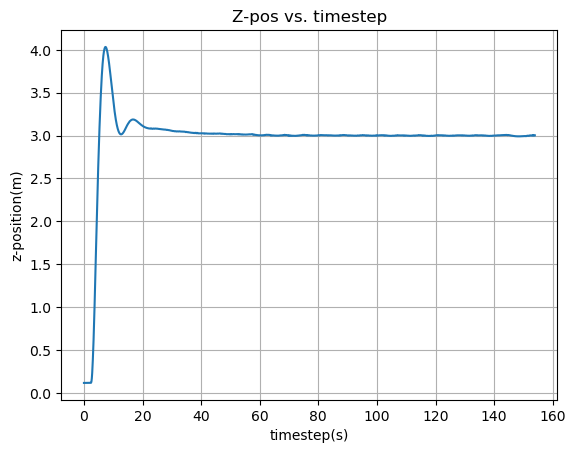

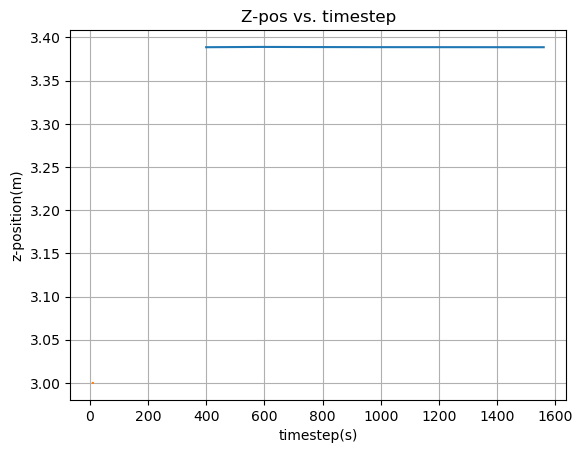

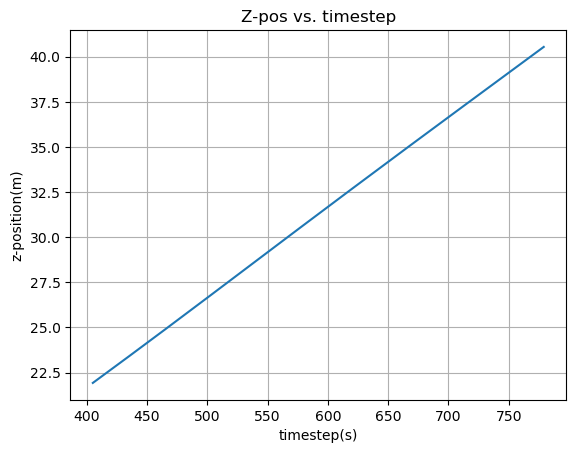

In [4]:
###Plot z-pos vs timestep
z_pos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of z-pos: {}".format(len(z_pos)))
print("length of timestep: {}".format(len(timestep)))
zpos_max = z_pos.max()
print("z-pos max: {}".format(zpos_max))
zpos_exp = float(3)
print("zpos_exp: {}".format(zpos_exp))
zpos_err = abs(zpos_max - zpos_exp)
print("zpos-error: {}".format(zpos_err))
print(z_pos[len(z_pos) - 5:])

##collect peaks from zpos
exp_error = 0.2
peaks, peak_props = find_peaks(z_pos, height=zpos_exp, distance=50)
print("No. of peaks found: {}".format(len(peaks)))
print(peaks)

#for i, peak in enumerate(peaks):
#    print("peak-{}: {:.4f}".format(i+1, z_pos[peak]))

peak_bal_val = 0
peak_time_indx = []
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = z_pos[peak]
    peak_time = timestep[peak]
    peak_time_indx.append(peak_time)
    #print("peak-{}: {}".format(peak_cnt+1, peak_val))
    #print("peak-time: {}".format(peak_time))
    peak_cnt+=1
print("peak times: {}".format(peak_time_indx))

final_adj_time = 0
zpos_arr = np.full((1, 400), 99.9)[0]
time_arr = np.full((1, 400), 99.9)[0]
zpos_idx = 0
zpos_mean_arr = []
time_mean_arr = []
zpos_slope_arr = []


#if acc_idx == size of arays, 
#then-->roll the arrays to left and write val to last index 
def rollZposArr(zpos_arr, time_arr):
    zpos_arr = np.roll(zpos_arr, -1)
    time_arr = np.roll(time_arr, -1)

if len(peak_time_indx) > 0:
    pk_time = peak_time_indx[0]
    idx = peaks[0]
    bal_time = 0
    while pk_time < timestep[len(timestep)-1] and final_adj_time == 0:
        z_temp = z_pos[idx]
        time_temp = timestep[idx]
        if zpos_idx == 400:
            rollZposArr(zpos_arr, time_arr)
            zpos_arr[-1] = z_temp
            time_arr[-1] = time_temp
            #zpos_idx = 0
        else:
            zpos_arr[zpos_idx] = z_temp
            time_arr[zpos_idx] = time_temp
            zpos_idx+=1
        #print(zpos_arr)
        zpos_mean = np.mean(zpos_arr)
        time_mean = np.mean(time_arr)
        
        zpos_slope = integrate.simpson(zpos_arr, time_arr)
        zpos_slope_arr.append(zpos_slope)
        
#         if abs(zpos_exp - zpos_mean) < exp_error:
#             print("zpos-mean: {}".format(zpos_mean))
#             print("diff w/ zpos-exp: {}".format(abs(zpos_exp - zpos_mean)))
#             print("zpos-slope: {}".format(zpos_slope))
#             print("final time: {}".format(time_temp))
            
        flat_slope_bool_a = np.array([np.round(zpos_slope, 3) > float(40),
                                   np.round(zpos_slope, 3) < float(45)])
        if abs(zpos_exp - zpos_mean) < exp_error and np.all(flat_slope_bool_a):
            final_adj_time = time_temp
            print("zpos-slope: {}".format(zpos_slope))
            print("final time: {}".format(final_adj_time))
            
        flat_slope_bool_b = np.array([np.round(zpos_slope, 3) > float(80),
                                   np.round(zpos_slope, 3) < float(85)])    
        if abs(zpos_exp - zpos_mean) < 0.5 and np.all(flat_slope_bool_b):
            final_adj_time = time_temp * float(10)
            print("zpos-slope: {}".format(zpos_slope))
            print("time-temp: {}".format(time_temp))
            print("final time: {}".format(final_adj_time))
            
#         if np.all(flat_slope_bool):
#             print("zpos diff at flat slope: {}".format(abs(zpos_exp - zpos_mean)))
#             final_adj_time = time_temp * float(5)
#             print("zpos-slope: {}".format(zpos_slope))
        
        zpos_mean_arr.append(zpos_mean)
        time_mean_arr.append(time_mean)

        idx += 1
        pk_time = timestep[idx]
    
    if final_adj_time == 0:
        adjust_time = 999
    else:
        adjust_time = final_adj_time - peak_time_indx[0]
        print("using found final adj time: {}".format(adjust_time))
    overshoot = z_pos[peaks[0]] - zpos_exp
else:
    #undershot_wgt = abs(z_pos.max() - zpos_exp)
    adjust_time = 999
    #overshoot = abs(z_pos.max() - zpos_exp) * float(5)
    overshoot = 999
print("adjustment-time: {:.4f}".format(adjust_time))
print("overshoot: {}".format(overshoot))

exp_adjust_time = float(3)#seconds
exp_overshoot = 0.05#meters

fitness = np.log10((adjust_time/exp_adjust_time) + 1) + np.log10((overshoot/exp_overshoot) + 1)
print("fitness: {}".format(fitness))


plt.plot(timestep, z_pos)
plt.title("Z-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("z-position(m)")
plt.grid()
plt.show()

zpos_mean_indices = np.array([i for i in range(len(zpos_mean_arr))])
ref_line = np.array([3 for i in range(len(zpos_mean_arr))])
plt.plot(zpos_mean_indices[400:], zpos_mean_arr[400:])
plt.plot(time_mean_arr[400:], ref_line[400:])
plt.title("Z-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("z-position(m)")
plt.grid()
plt.show()

zpos_slope_indices = np.array([i for i in range(len(zpos_slope_arr))])
plt.plot(zpos_slope_indices[405:780], zpos_slope_arr[405:780])
plt.title("Z-pos vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("z-position(m)")
plt.grid()
plt.show()

In [5]:
#save zpos default performance w/ timestep
default_npy_file = os.getcwd() + r"\perform_by_param_plots\default_param_plots\default_param_perf.npy"
# if os.path.isfile(default_npy_file):
#     os.remove(default_npy_file)
# with open(default_npy_file, 'wb') as def_file:
#     np.save(def_file, np.array([z_pos, timestep]))

#save zpos default performance w/ timestep
tuned_npy_file = os.getcwd() + r"\perform_by_param_plots\tuned_param_plots\tuned_param_perf.npy"
# if os.path.isfile(tuned_npy_file):
#     os.remove(tuned_npy_file)
# with open(tuned_npy_file, 'wb') as tuned_file:
#     np.save(tuned_file, np.array([z_pos, timestep]))

#save zpos default performance w/ timestep
best_tuned_npy_file = os.getcwd() + r"\perform_by_param_plots\best_tuned_param_plots\best_tuned_param_perf.npy"
# if os.path.isfile(best_tuned_npy_file):
#     os.remove(best_tuned_npy_file)
# with open(best_tuned_npy_file, 'wb') as best_tuned_file:
#     np.save(best_tuned_file, np.array([z_pos, timestep]))
    

In [6]:
default_data = np.load(default_npy_file)
print(default_data.shape)
tuned_data = np.load(tuned_npy_file)
print(tuned_data.shape)
best_tuned_data = np.load(best_tuned_npy_file)
print(best_tuned_data.shape)

(2, 1876)
(2, 1876)
(2, 1876)


In [7]:
zpos_default = default_data[0]
time_default = default_data[1]
zpos_tuned = tuned_data[0]
time_tuned = tuned_data[1]
zpos_best_tuned = best_tuned_data[0]
time_best_tuned = best_tuned_data[1]

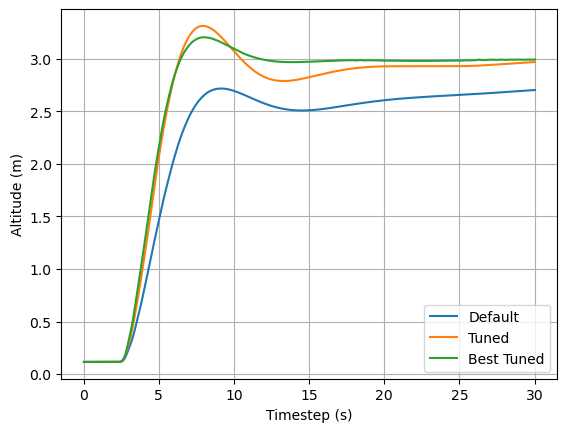

In [52]:
plt.plot(time_default, zpos_default)
plt.plot(time_tuned, zpos_tuned)
plt.plot(time_best_tuned, zpos_best_tuned)
#plt.title("Altitude Rise vs. Timestep")
plt.xlabel("Timestep (s)")
plt.ylabel("Altitude (m)")
plt.legend(['Default', 'Tuned', 'Best Tuned'])
plt.grid()
plt.show()

length of yaw-rot: 9618
length of timestep: 9618
yaw-rot max: 3.141547365551496
yaw-error: 2.821547365551496
[-3.13962429 -3.13761481 -3.13560792 -3.13359678 -3.13157764]
No. of peaks found: 17
{'peak_heights': array([0.40739569, 0.34029985, 0.34778552, 0.34735529, 2.2431527 ,
       2.51906026, 2.83265774, 3.0880717 , 3.14154737, 0.57977186,
       0.87954574, 1.21043976, 2.99584231, 2.97984645, 2.97353239,
       3.02173693, 3.14153991])}
peak-0: 0.4074
peak-1: 0.3403
peak-2: 0.3478
peak-3: 0.3474
peak-4: 2.2432
peak-5: 2.5191
peak-6: 2.8327
peak-7: 3.0881
peak-8: 3.1415
peak-9: 0.5798
peak-10: 0.8795
peak-11: 1.2104
peak-12: 2.9958
peak-13: 2.9798
peak-14: 2.9735
peak-15: 3.0217
peak-16: 3.1415
peak-error: 0.08739569364811228
peak-error: 0.0202998525187148
final peak val: 0.3403
adjustment-time: 3.7600
overshoot: 0.18453678079828162
fitness: 1.7768


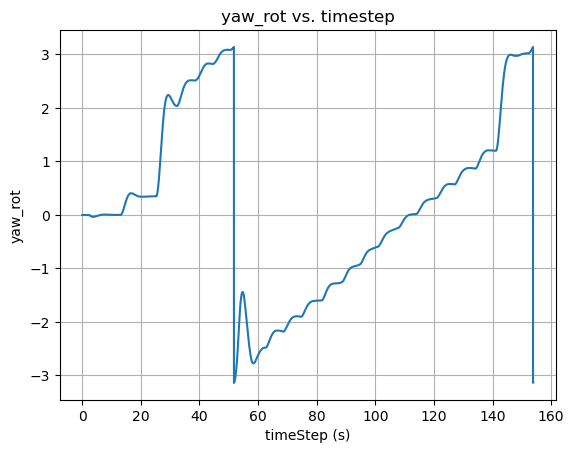

length of yaw_angle: 9618


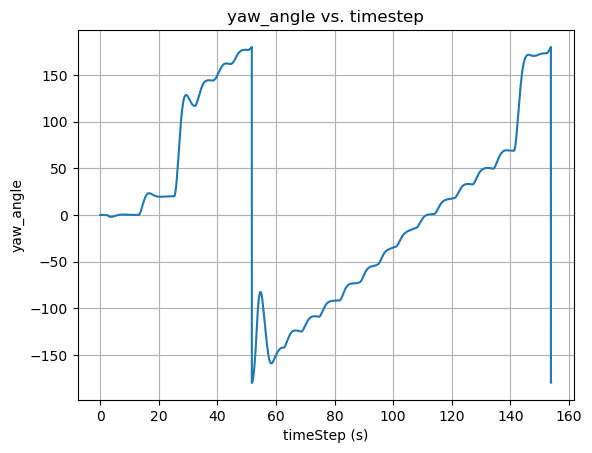

In [9]:
###plot yaw-rot over time
yaw_rot = np.array(bot_stateDF["yaw_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yaw-rot: {}".format(len(yaw_rot)))
print("length of timestep: {}".format(len(timestep)))
yaw_max = yaw_rot.max()
print("yaw-rot max: {}".format(yaw_max))
yaw_exp = 0.32
yaw_err = abs(yaw_max - yaw_exp)
print("yaw-error: {}".format(yaw_err))
print(yaw_rot[len(yaw_rot) - 5:])

#collect peaks from yaw
exp_error = 0.05
peaks, peak_props = find_peaks(yaw_rot, height=yaw_exp, distance=50)
print("No. of peaks found: {}".format(len(peaks)))
print(peak_props)

for i, peak in enumerate(peaks):
    print("peak-{}: {:.4f}".format(i, yaw_rot[peak]))

peak_bal_val = 0
peak_time_indx = []
peak_cnt = 0
peak_sum = 0
while peak_bal_val == 0 and peak_cnt < len(peaks):
    peak = peaks[peak_cnt]
    peak_val = yaw_rot[peak]
    peak_time = timestep[peak]
    peak_time_indx.append(peak_time)
    #print("peak-{}: {}".format(peak_cnt+1, peak_val))
    #print("peak-time: {}".format(peak_time))
    peak_err = peak_val - yaw_exp
    print("peak-error: {}".format(peak_err))
    if peak_err < exp_error:
        peak_bal_val = peak_val
    peak_cnt+=1
print("final peak val: {:.4f}".format(peak_bal_val))
if len(peaks) > 0:
    adjust_time = peak_time_indx[len(peak_time_indx)-1] - peak_time_indx[0]
    overshoot = z_pos[peaks[0]] - z_pos[peaks[len(peaks)-1]]
else:
    adjust_time = 999
    overshoot = 999
print("adjustment-time: {:.4f}".format(adjust_time))
print("overshoot: {}".format(overshoot))

exp_adjust_time = 0.32#seconds
exp_overshoot = 0.05#degrees

fitness = np.log10((adjust_time/exp_adjust_time) + 1) + np.log10((overshoot/exp_overshoot) + 1)
print("fitness: {:.4f}".format(fitness))
    
plt.plot(timestep, yaw_rot)
plt.title("yaw_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_rot")
plt.grid()
plt.show()


yaw_angle = np.multiply((float(180)/math.pi), yaw_rot)
print("length of yaw_angle: {}".format(len(yaw_angle)))
plt.plot(timestep, yaw_angle)
plt.title("yaw_angle vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_angle")
plt.grid()
plt.show()

In [10]:
#save yaw default performance w/ timestep
default_npy_file_yaw = os.getcwd() + r"\perform_by_param_plots\default_param_plots\default_param_perf_yaw.npy"
# if os.path.isfile(default_npy_file_yaw):
#     os.remove(default_npy_file_yaw)
# with open(default_npy_file_yaw, 'wb') as def_file:
#     np.save(def_file, np.array([yaw_rot, timestep]))

#save yaw default performance w/ timestep
tuned_npy_file_yaw = os.getcwd() + r"\perform_by_param_plots\tuned_param_plots\tuned_param_perf_yaw.npy"
# if os.path.isfile(tuned_npy_file_yaw):
#     os.remove(tuned_npy_file_yaw)
# with open(tuned_npy_file_yaw, 'wb') as tuned_file:
#     np.save(tuned_file, np.array([yaw_rot, timestep]))

#save yaw default performance w/ timestep
best_tuned_npy_file_yaw = os.getcwd() + r"\perform_by_param_plots\best_tuned_param_plots\best_tuned_param_perf_yaw.npy"
# if os.path.isfile(best_tuned_npy_file_yaw):
#     os.remove(best_tuned_npy_file_yaw)
# with open(best_tuned_npy_file_yaw, 'wb') as best_tuned_file:
#     np.save(best_tuned_file, np.array([yaw_rot, timestep]))

In [11]:
default_data_yaw = np.load(default_npy_file_yaw)
print(default_data_yaw.shape)
tuned_data_yaw = np.load(tuned_npy_file_yaw)
print(tuned_data_yaw.shape)
best_tuned_data_yaw = np.load(best_tuned_npy_file_yaw)
print(best_tuned_data_yaw.shape)

(2, 5626)
(2, 5626)
(2, 5626)


In [12]:
yaw_default = default_data_yaw[0]
yaw_time_default = default_data_yaw[1]
yaw_tuned = tuned_data_yaw[0]
yaw_time_tuned = tuned_data_yaw[1]
yaw_best_tuned = best_tuned_data_yaw[0]
yaw_time_best_tuned = best_tuned_data_yaw[1]

In [13]:
yaw_ang_def = np.multiply((float(180)/math.pi), yaw_default)
yaw_ang_tuned = np.multiply((float(180)/math.pi), yaw_tuned)
yaw_ang_best_tuned = np.multiply((float(180)/math.pi), yaw_best_tuned)

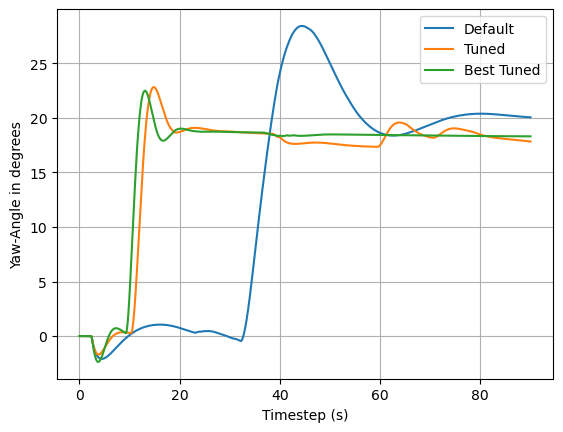

In [51]:
plt.plot(yaw_time_default, yaw_ang_def)
plt.plot(yaw_time_tuned, yaw_ang_tuned)
plt.plot(yaw_time_best_tuned, yaw_ang_best_tuned)
#plt.title("Yaw-Change to Tgt. vs. Timestep")
plt.xlabel("Timestep (s)")
plt.ylabel("Yaw-Angle in degrees")
plt.legend(['Default', 'Tuned', 'Best Tuned'])
plt.grid()
plt.show()

In [15]:
#return array of pitch waypts
def generatePitchWaypts(calcd_dist, calcd_timestep):
    #calculate number of waypoints
    #num_of_waypts = np.round(calcd_dist) / (self.pitch_velocity * calcd_timestep)
    num_of_waypts  = len(x_pos)
    print("num of waypts: {}".format(num_of_waypts))
    # Calculate the vector from origin to target
    x_wypt = 7.6
    y_wypt = 2.5
    delta_x = x_wypt - x_pos[0]
    delta_y = y_wypt - y_pos[0]
    # Calculate the step size for each waypoint
    if num_of_waypts > 1:
        step_x = delta_x / (num_of_waypts - 1) 
        step_y = delta_y / (num_of_waypts - 1)
    else:
        step_x = 0
        step_y = 0
    # Generate the list of waypoints
    waypoints = []
    for i in range(int(num_of_waypts)):
        x = x_pos[0] + i * step_x
        y = y_pos[1] + i * step_y
        waypoints.append((x, y))
    return waypoints

In [16]:
#display error between flight trajectory and 
#get true-trajectory distance from center
def getFlightMSE(x_true, y_true, x_traj, y_traj):
    true_dist = np.sqrt(np.square(x_true) + np.square(y_true))
    true_dist_avg = np.round(np.mean(true_dist), 4)
    print(true_dist_avg)
    true_dist = np.full(len(x_traj), true_dist_avg)
    #print(true_dist)
    print(len(true_dist))
    #get flight-trajectory distance from cetner
    flgt_dist = np.sqrt(np.square(x_traj) + np.square(y_traj))
    #print(flgt_dist)
    print(len(flgt_dist))
    #collect mse(true vs. flight)
    flgt_MSE = mean_squared_error(true_dist, flgt_dist)
    print("MSE: {:.4f}".format(flgt_MSE))
    flgt_SSE = np.log10(np.sum((flgt_dist[1000:] - true_dist[1000:])**2))
    #flgt_SSE = np.sum((flgt_dist - true_dist)**2)
    print("log10(SSE): {:.4f}".format(flgt_SSE))
    #return flgt_MSE
    return flgt_SSE

In [17]:
#plot travelled trajectory on top of true-trajectory
def getTrueTraj():
    waypoint_traj = os.getcwd() + '\\waypoint_logfile.txt'
    #waypoint_traj = os.getcwd() + '\\waypoint_logfile_infinity.txt'
    cols = ['xpos', 'ypos', 'zpos']
    trueTrajDF = pd.read_csv(waypoint_traj, sep=" ", names=cols)
    x_list = np.array(trueTrajDF['xpos'])
    y_list = np.array(trueTrajDF['ypos'])
    z_list = np.array(trueTrajDF['zpos'])
    return x_list, y_list, z_list

In [18]:
def getOvshootFitness(input_dim,
                      input_time,
                      dim_exp,
                      exp_error):
    peaks, peak_props = find_peaks(input_dim, height=dim_exp, distance=10)
    print("No. of peaks found: {}".format(len(peaks)))
    print(peaks)

    #for i, peak in enumerate(peaks):
    #    print("peak-{}: {:.4f}".format(i+1, input_dim[peak]))

    peak_bal_val = 0
    peak_time_indx = []
    peak_cnt = 0
    peak_sum = 0
    while peak_bal_val == 0 and peak_cnt < len(peaks):
        peak = peaks[peak_cnt]
        peak_val = input_dim[peak]
        peak_time = input_time[peak]
        peak_time_indx.append(peak_time)
        #print("peak-{}: {}".format(peak_cnt+1, peak_val))
        #print("peak-time: {}".format(peak_time))
        peak_cnt+=1
    print("peak times: {}".format(peak_time_indx))

    final_adj_time = 0
    dim_arr = np.full((1, 400), 99.9)[0]
    time_arr = np.full((1, 400), 99.9)[0]
    dim_idx = 0
    dim_mean_arr = []
    time_mean_arr = []
    dim_slope_arr = []


    #if acc_idx == size of arays, 
    #then-->roll the arrays to left and write val to last index 
    def rollDimArr(dim_arr, time_arr):
        dim_arr = np.roll(zpos_arr, -1)
        time_arr = np.roll(time_arr, -1)

    if len(peak_time_indx) > 0:
        pk_time = peak_time_indx[0]
        idx = peaks[0]
        bal_time = 0
        while pk_time < timestep[len(timestep)-1] and final_adj_time == 0:
            dim_temp = input_dim[idx]
            time_temp = timestep[idx]
            if dim_idx == 400:
                rollDimArr(dim_arr, time_arr)
                dim_arr[-1] = dim_temp
                time_arr[-1] = time_temp
                dim_idx = 0
            else:
                dim_arr[dim_idx] = dim_temp
                time_arr[dim_idx] = time_temp
                dim_idx+=1

            dim_mean = np.mean(dim_arr)
            time_mean = np.mean(time_arr)

            dim_slope = integrate.simpson(dim_arr, time_arr)
            dim_slope_arr.append(dim_slope)

            #bool-array for w/in slope bounds
            flat_slope_bool_a = np.array([np.round(dim_slope, 3) > float(40),
                                        np.round(dim_slope, 3) < float(45)])
            #if altitude is now stedy and below exp-error
            if abs(dim_exp - dim_mean) < exp_error and np.all(flat_slope_bool_a):
                #collect time as final-adj-time
                final_adj_time = time_temp
                print("final time: {}".format(final_adj_time))

            flat_slope_bool_b = np.array([np.round(dim_slope, 3) > float(80),
                                       np.round(dim_slope, 3) < float(85)])    
            if abs(dim_exp - dim_mean) < 0.5 and np.all(flat_slope_bool_b):
                final_adj_time = time_temp * float(10)
                print("final time: {}".format(final_adj_time))
            
            
            
            if abs(dim_exp - dim_mean) < exp_error and np.round(dim_slope, 3) == 0:
                final_adj_time = time_temp
                print("final time: {}".format(final_adj_time))

            dim_mean_arr.append(dim_mean)
            time_mean_arr.append(time_mean)

            idx += 1
            pk_time = timestep[idx]

        if final_adj_time == 0:
            adjust_time = 999
        else:
            adjust_time = final_adj_time - peak_time_indx[0]
        overshoot = input_dim[peaks[0]] - dim_exp
    else:
        adjust_time = 999
        overshoot = 999
    print("adjustment-time: {:.4f}".format(adjust_time))
    print("overshoot: {}".format(overshoot))

    exp_adjust_time = 5.0#seconds
    exp_overshoot = 0.05#meters

    fitness = np.log10((adjust_time/exp_adjust_time) + 1) + np.log10((overshoot/exp_overshoot) + 1)
    print("fitness: {}".format(fitness))

    return fitness



length of yaw-rot: 9618
length of timestep: 9618
yaw-rot max: 3.141547365551496
yaw-error: 2.821547365551496
[-3.13962429 -3.13761481 -3.13560792 -3.13359678 -3.13157764]
No. of peaks found: 28
[1041 1276 1501 1518 1533 1546 1557 1832 2322 2689 3090 3233 7847 8263
 8273 8308 8651 8668 8679 8698 9132 9143 9206 9225 9266 9466 9492 9612]
peak times: [16.672, 20.432, 24.032, 24.304, 24.544, 24.752, 24.928, 29.328, 37.168, 43.04, 49.456, 51.744, 125.568, 132.224, 132.384, 132.94400000000002, 138.43200000000002, 138.704, 138.88, 139.184, 146.128, 146.304, 147.312, 147.616, 148.272, 151.472, 151.888, 153.808]
adjustment-time: 999.0000
overshoot: 0.08739569364811228
fitness: 2.741766825112528
yaw fitness: 2.741766825112528


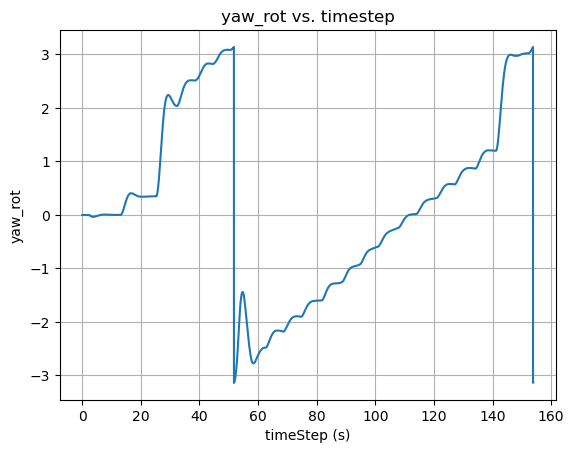

length of yaw_angle: 9618


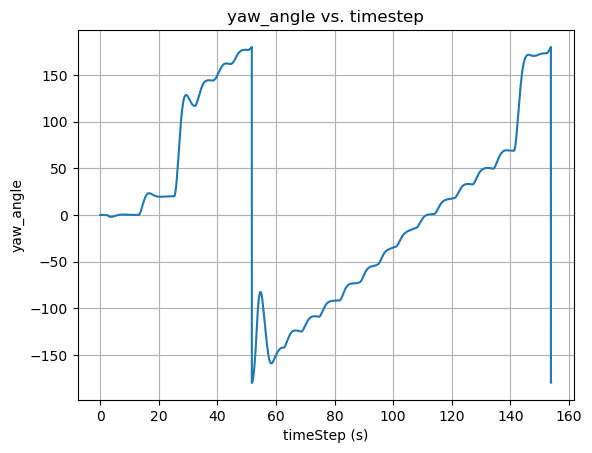

In [19]:
###plot yaw-rot over time
yaw_rot = np.array(bot_stateDF["yaw_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of yaw-rot: {}".format(len(yaw_rot)))
print("length of timestep: {}".format(len(timestep)))
yaw_max = yaw_rot.max()
print("yaw-rot max: {}".format(yaw_max))
yaw_exp = 0.32
yaw_err = abs(yaw_max - yaw_exp)
print("yaw-error: {}".format(yaw_err))
print(yaw_rot[len(yaw_rot) - 5:])

yaw_fitness = getOvshootFitness(yaw_rot, timestep, yaw_exp, exp_error=0.05)
print("yaw fitness: {}".format(yaw_fitness))


plt.plot(timestep, yaw_rot)
plt.title("yaw_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_rot")
plt.grid()
plt.show()


yaw_angle = np.multiply((float(180)/math.pi), yaw_rot)
print("length of yaw_angle: {}".format(len(yaw_angle)))
plt.plot(timestep, yaw_angle)
plt.title("yaw_angle vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("yaw_angle")
plt.grid()
plt.show()

In [20]:
###Plot z-pos vs timestep
z_pos = np.array(bot_stateDF["z_pos"])
timestep = np.array(bot_stateDF["timestep"])
print("length of z-pos: {}".format(len(z_pos)))
print("length of timestep: {}".format(len(timestep)))
zpos_max = z_pos.max()
print("z-pos max: {}".format(zpos_max))
zpos_exp = float(3)
print("zpos_exp: {}".format(zpos_exp))
zpos_err = abs(zpos_max - zpos_exp)
print("zpos-error: {}".format(zpos_err))
print(z_pos[len(z_pos) - 5:])

length of z-pos: 9618
length of timestep: 9618
z-pos max: 4.034223286906932
zpos_exp: 3.0
zpos-error: 1.0342232869069319
[3.00391129 3.00384767 3.00373741 3.00358916 3.00341227]


In [21]:
zpos_fitness = getOvshootFitness(z_pos, timestep, zpos_exp, exp_error=0.05)

No. of peaks found: 202
[ 460 1040 1407 1435 1456 1478 1518 1553 1582 1711 1743 1774 1805 1911
 1951 1981 2003 2019 2038 2061 2079 2113 2144 2183 2216 2246 2277 2317
 2348 2386 2424 2459 2489 2514 2549 2582 2615 2649 2682 2708 2749 2781
 2810 2841 2880 2907 2942 2977 3016 3056 3088 3120 3152 3186 3214 3235
 3268 3304 3338 3375 3410 3450 3490 3523 3555 3584 3629 3662 3693 3726
 3766 3799 3830 3860 3887 3920 3950 4000 4034 4067 4101 4142 4167 4193
 4216 4246 4283 4317 4350 4386 4421 4561 4615 4641 4670 4706 4740 4773
 4809 4845 4880 4914 4943 4974 5005 5045 5079 5106 5141 5179 5219 5253
 5289 5323 5358 5400 5411 5446 5476 5522 5556 5592 5616 5651 5687 5722
 5797 5834 5868 5903 5940 5975 6000 6034 6070 6106 6175 6204 6235 6269
 6320 6349 6386 6424 6459 6493 6651 6690 6727 6764 6800 6839 6872 7039
 7083 7111 7138 7176 7207 7243 7278 7405 7452 7497 7522 7555 7594 7633
 7673 7706 7741 7870 7917 7949 7978 8001 8038 8078 8112 8147 8284 8351
 8383 8420 8456 8490 8523 8557 8791 8826 8860 8901 89

length of roll-rot: 9618
length of timestep: 9618
average of roll-rot: 0.0007471486085643027
[-0.00273208 -0.00303065 -0.00334142 -0.00358728 -0.00373025]
[2.23680238e-06 2.21621819e-06 2.21306979e-06 2.22003366e-06
 2.23232507e-06 2.24702503e-06]
roll-rot max: 0.0283868201848465
roll-error: 0.0273868201848465
No. of peaks found: 244
[ 152  166  181  211  241  803  818  854  867  880  892  907  920  935
  999 1011 1025 1039 1056 1080 1090 1101 1118 1463 1489 1502 1520 1533
 1722 1741 1754 1767 1788 1805 1815 1830 1849 1861 1882 1895 1914 1927
 1937 1981 2163 2178 2190 2201 2218 2234 2257 2274 2292 2302 2322 2336
 2350 2363 2437 2452 2580 2593 2608 2626 2642 2653 2669 2686 2755 2855
 2868 2979 3040 3214 3298 3320 3330 3346 3388 3401 3413 3427 3441 3458
 3477 3499 3529 3557 3603 3754 3769 3787 3804 3837 3850 3866 4016 4032
 4047 4071 4087 4107 4118 4131 4147 4172 4221 4414 4426 4447 4464 4480
 4499 4512 4533 4588 4645 4793 4806 4822 4836 4859 4883 4900 4918 4944
 4980 5018 5031 5204 5239

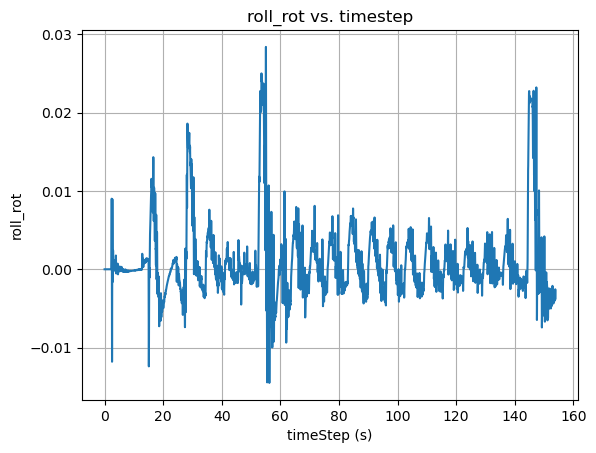

In [22]:
###plot roll-rot over time
roll_rot = np.array(bot_stateDF["roll_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of roll-rot: {}".format(len(roll_rot)))
print("length of timestep: {}".format(len(timestep)))
print("average of roll-rot: {}".format(np.mean(roll_rot)))
print(roll_rot[len(roll_rot) - 5:])
print(roll_rot[:6])
roll_max = roll_rot.max()
print("roll-rot max: {}".format(roll_max))
roll_exp = 0.001
roll_err = abs(roll_max - roll_exp)
print("roll-error: {}".format(roll_err))


roll_fitness = getOvshootFitness(roll_rot, timestep, roll_exp, exp_error=0.05)
print("roll-fitness: {}".format(roll_fitness))

plt.plot(timestep, roll_rot)
plt.title("roll_rot vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("roll_rot")
plt.grid()
plt.show()


length of pitch-rot: 9618
length of timestep: 9618
[-0.0409959  -0.0398949  -0.03805854 -0.03563078 -0.03276716]
pitch-rot max: 0.0984079652439747
pitch-error: 0.0784079652439747
No. of peaks found: 158
[ 171  203  235  268  303  953  987 1021 1053 1088 1120 1153 1187 1222
 1256 1290 1325 1358 1385 1419 1461 1759 1793 1827 1861 1899 1929 2167
 2201 2233 2268 2302 2332 2368 2407 2566 2599 2634 2654 2673 2689 2728
 2763 2924 2962 2998 3037 3103 3136 3286 3323 3356 3392 3613 3647 3679
 3713 3754 3780 3842 3985 4018 4051 4085 4119 4153 4174 4224 4369 4405
 4439 4475 4508 4541 4756 4791 4829 4864 4900 4923 5023 5200 5237 5272
 5307 5343 5367 5426 5461 5633 5669 5706 5741 5777 5815 6017 6052 6089
 6125 6158 6216 6253 6407 6442 6478 6513 6544 6560 6571 6606 6821 6856
 6891 6926 6959 7015 7055 7225 7261 7297 7333 7385 7424 7655 7690 7725
 7761 7796 7811 7852 8060 8096 8131 8167 8194 8219 8265 8506 8541 8575
 8608 8645 8690 9034 9070 9105 9142 9178 9214 9251 9286 9322 9359 9393
 9426 9502 9561 

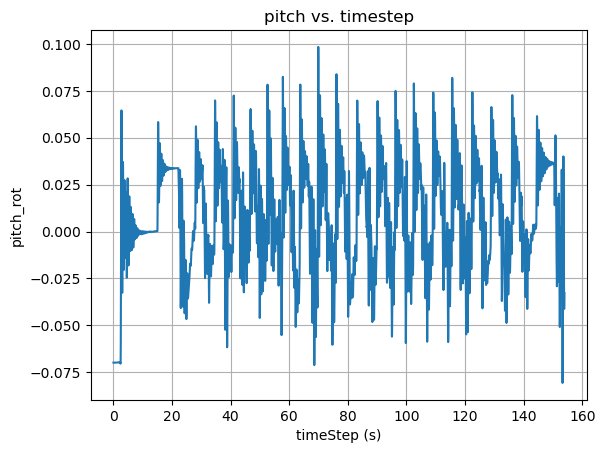

In [23]:
###plot pitch-rot over time
pitch_rot = np.array(bot_stateDF["pitch_rot"])
timestep = np.array(bot_stateDF["timestep"])
print("length of pitch-rot: {}".format(len(pitch_rot)))
print("length of timestep: {}".format(len(timestep)))
print(pitch_rot[len(pitch_rot) - 5:])

pitch_max = pitch_rot.max()
print("pitch-rot max: {}".format(pitch_max))
pitch_exp = 0.02
pitch_err = abs(pitch_max - pitch_exp)
print("pitch-error: {}".format(pitch_err))

pitch_fitness = getOvshootFitness(pitch_rot, timestep, pitch_exp, exp_error=0.05)

plt.plot(timestep, pitch_rot)
plt.title("pitch vs. timestep")
plt.xlabel("timeStep (s)")
plt.ylabel("pitch_rot")
plt.grid()
plt.show()

[0.61610944 0.6084839  0.60085917 0.59324432 0.58564269 0.57805958
 0.57050167 0.56297647 0.55548489 0.54803513 0.5406352  0.53329277
 0.52601485 0.51880795 0.51167778 0.5046399  0.49769708 0.49085108
 0.48410263 0.4774514 ]
No. of peaks found: 0
[]
peak times: []
adjustment-time: 999.0000
overshoot: 999
fitness: 6.603380928279563


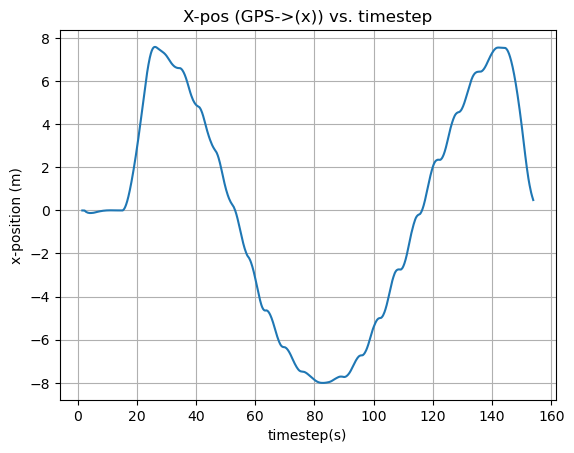

0.4774513985092637


In [24]:
x_pos = np.array(bot_stateDF["x_pos"])
print(x_pos[len(x_pos) - 20:])
timestep = np.array(bot_stateDF["timestep"])
x_pos_fitness = getOvshootFitness(x_pos, timestep, dim_exp=7.6, exp_error=0.1)

plt.plot(timestep[100:], x_pos[100:])
plt.title("X-pos (GPS->(x)) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("x-position (m)")
plt.grid()
plt.show()
print(x_pos[len(x_pos)-1])

In [25]:
#save xpos default performance w/ timestep
default_npy_file_xpos = os.getcwd() + r"\perform_by_param_plots\default_param_plots\default_param_perf_xpos.npy"
# if os.path.isfile(default_npy_file_xpos):
#     os.remove(default_npy_file_xpos)
# with open(default_npy_file_xpos, 'wb') as def_file:
#     np.save(def_file, np.array([x_pos, timestep]))

#save xpos default performance w/ timestep
tuned_npy_file_xpos = os.getcwd() + r"\perform_by_param_plots\tuned_param_plots\tuned_param_perf_xpos.npy"
# if os.path.isfile(tuned_npy_file_xpos):
#     os.remove(tuned_npy_file_xpos)
# with open(tuned_npy_file_xpos, 'wb') as tuned_file:
#     np.save(tuned_file, np.array([x_pos, timestep]))

#save xpos default performance w/ timestep
best_tuned_npy_file_xpos = os.getcwd() + r"\perform_by_param_plots\best_tuned_param_plots\best_tuned_param_perf_xpos.npy"
# if os.path.isfile(best_tuned_npy_file_xpos):
#     os.remove(best_tuned_npy_file_xpos)
# with open(best_tuned_npy_file_xpos, 'wb') as best_tuned_file:
#     np.save(best_tuned_file, np.array([x_pos, timestep]))

In [26]:
default_data_xpos = np.load(default_npy_file_xpos)
print(default_data_xpos.shape)
tuned_data_xpos = np.load(tuned_npy_file_xpos)
print(tuned_data_xpos.shape)
best_tuned_data_xpos = np.load(best_tuned_npy_file_xpos)
print(best_tuned_data_xpos.shape)

(2, 11251)
(2, 11251)
(2, 11251)


In [27]:
xpos_default = default_data_xpos[0]
xpos_time_default = default_data_xpos[1]
xpos_tuned = tuned_data_xpos[0]
xpos_time_tuned = tuned_data_xpos[1]
xpos_best_tuned = best_tuned_data_xpos[0]
xpos_time_best_tuned = best_tuned_data_xpos[1]

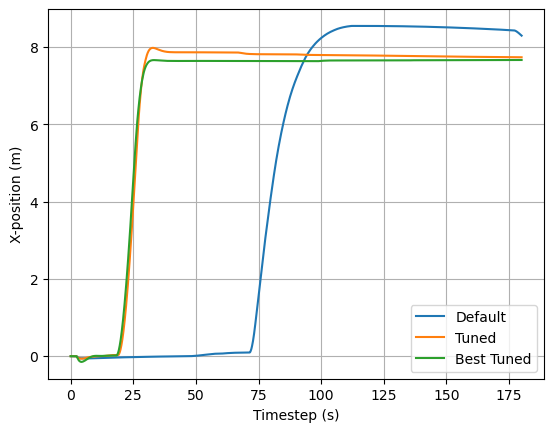

In [50]:
plt.plot(xpos_time_default, xpos_default)
plt.plot(xpos_time_tuned, xpos_tuned)
plt.plot(xpos_time_best_tuned, xpos_best_tuned)
#plt.title("X-pos. over params vs. Timestep")
plt.xlabel("Timestep (s)")
plt.ylabel("X-position (m)")
plt.legend(['Default', 'Tuned', 'Best Tuned'])
plt.grid()
plt.show()

[0.09238162 0.0933096  0.09422326 0.09512394 0.09601216 0.09688817
 0.09775201 0.0986035  0.09944942 0.1002861  0.10111049 0.10192072
 0.10271914 0.10350477 0.10427748 0.10503358 0.10577611 0.1065077
 0.10723003 0.10794374]
No. of peaks found: 6
[1659 3270 3607 3985 4363 4749]
peak times: [26.56, 52.336, 57.728, 63.776, 69.824, 76.0]
adjustment-time: 999.0000
overshoot: 0.07398253861802395
fitness: 2.697154228687702


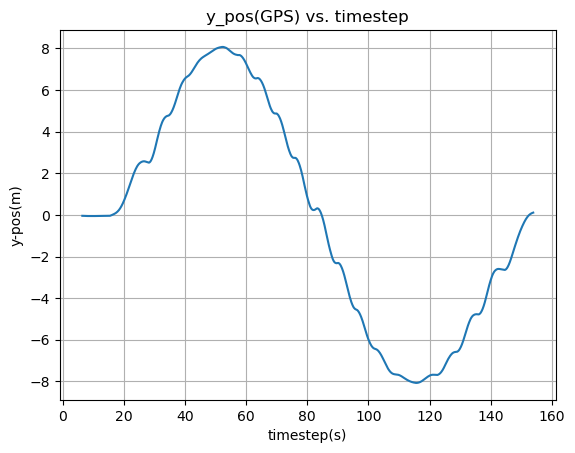

In [29]:
###Plot y-dot global from matmul(local2global rot-matrix, integ. y-acc)vs timestep
y_pos = np.array(bot_stateDF["y_pos"])
print(y_pos[len(y_pos) - 20:])
timestep = np.array(bot_stateDF["timestep"])
y_pos_fitness = getOvshootFitness(y_pos, timestep, dim_exp=2.5, exp_error=0.1)

plt.plot(timestep[400:], y_pos[400:])
plt.title("y_pos(GPS) vs. timestep")
plt.xlabel("timestep(s)")
plt.ylabel("y-pos(m)")
plt.grid()
plt.show()

In [30]:
#save ypos default performance w/ timestep
default_npy_file_ypos = os.getcwd() + r"\perform_by_param_plots\default_param_plots\default_param_perf_ypos.npy"
# if os.path.isfile(default_npy_file_ypos):
#     os.remove(default_npy_file_ypos)
# with open(default_npy_file_ypos, 'wb') as def_file:
#     np.save(def_file, np.array([y_pos, timestep]))

#save ypos default performance w/ timestep
tuned_npy_file_ypos = os.getcwd() + r"\perform_by_param_plots\tuned_param_plots\tuned_param_perf_ypos.npy"
# if os.path.isfile(tuned_npy_file_ypos):
#     os.remove(tuned_npy_file_ypos)
# with open(tuned_npy_file_ypos, 'wb') as tuned_file:
#     np.save(tuned_file, np.array([y_pos, timestep]))

#save ypos default performance w/ timestep
best_tuned_npy_file_ypos = os.getcwd() + r"\perform_by_param_plots\best_tuned_param_plots\best_tuned_param_perf_ypos.npy"
# if os.path.isfile(best_tuned_npy_file_ypos):
#     os.remove(best_tuned_npy_file_ypos)
# with open(best_tuned_npy_file_ypos, 'wb') as best_tuned_file:
#     np.save(best_tuned_file, np.array([y_pos, timestep]))

In [31]:
default_data_ypos = np.load(default_npy_file_ypos)
print(default_data_ypos.shape)
tuned_data_ypos = np.load(tuned_npy_file_ypos)
print(tuned_data_ypos.shape)
best_tuned_data_ypos = np.load(best_tuned_npy_file_ypos)
print(best_tuned_data_ypos.shape)

(2, 11251)
(2, 11251)
(2, 11251)


In [32]:
ypos_default = default_data_ypos[0]
ypos_time_default = default_data_ypos[1]
ypos_tuned = tuned_data_ypos[0]
ypos_time_tuned = tuned_data_ypos[1]
ypos_best_tuned = best_tuned_data_ypos[0]
ypos_time_best_tuned = best_tuned_data_ypos[1]

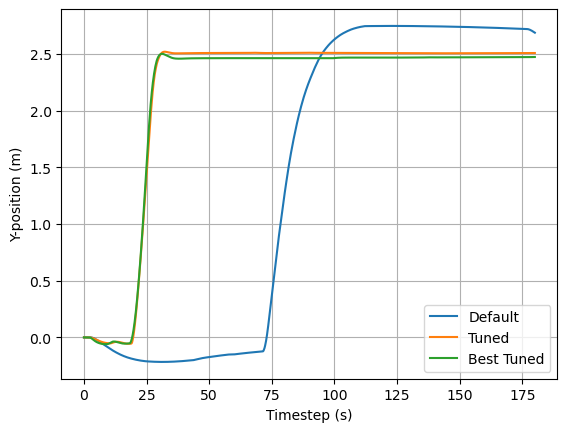

In [49]:
plt.plot(ypos_time_default, ypos_default)
plt.plot(ypos_time_tuned, ypos_tuned)
plt.plot(ypos_time_best_tuned, ypos_best_tuned)
#plt.title("Y-pos. over params vs. Timestep")
plt.xlabel("Timestep (s)")
plt.ylabel("Y-position (m)")
plt.legend(['Default', 'Tuned', 'Best Tuned'])
plt.grid()
plt.show()

num of waypts: 9618
len of xref: 9618
len of yref: 9618
7.2464
9618
9618
MSE: 7.7465
log10(SSE): 4.3598


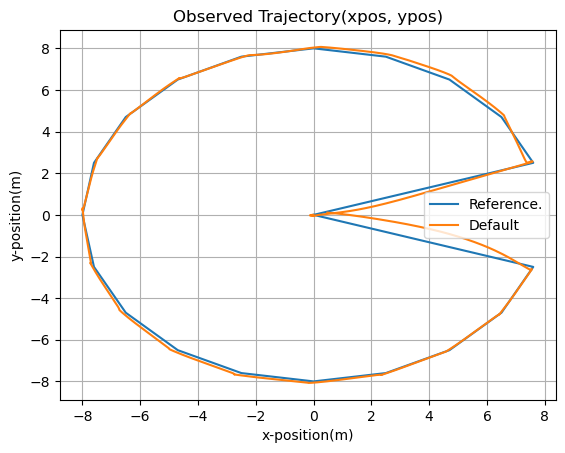

In [34]:
#plot trajectory reference path
x_wypt = 7.6
y_wypt = 2.5
calcd_dist = np.sqrt(((y_wypt - y_pos[0]) ** 2) + ((x_wypt - x_pos[0]) ** 2))
step = timestep[1] - timestep[0]
reference_path = generatePitchWaypts(calcd_dist, step)
x_ref = []
y_ref = []
for i, ref_pt in enumerate(reference_path):
    x_ref.append(ref_pt[0])
    y_ref.append(ref_pt[1])

print("len of xref: {}".format(len(x_ref)))
print("len of yref: {}".format(len(y_ref)))



x_true, y_true, z_true = getTrueTraj()
plt.plot(x_true, y_true)
plt.xlabel("x-val trajectory (m)")
plt.ylabel("y-val trajectory (m)")
plt.title("Pac-Man Plot")

trajMSE = getFlightMSE(x_true, y_true, x_pos, y_pos)

    
#plot trajectory for pitch chg. (xpos, ypos)
plt.plot(x_pos, y_pos)
#plt.plot(x_ref, y_ref)
plt.title("Observed Trajectory(xpos, ypos)")
plt.legend(['Reference.', 'Default'])
plt.xlabel("x-position(m)")
plt.ylabel("y-position(m)")
plt.grid()
plt.show()

In [35]:
#save log10-SSE default performance for course
default_npy_file_crs = os.getcwd() + r"\perform_by_param_plots\default_param_plots\default_param_perf_course.npy"
# if os.path.isfile(default_npy_file_crs):
#     os.remove(default_npy_file_crs)
# with open(default_npy_file_crs, 'wb') as def_file:
#     np.save(def_file, np.array([x_pos, y_pos]))

#save log10-SSE default performance for course
tuned_npy_file_crs = os.getcwd() + r"\perform_by_param_plots\tuned_param_plots\tuned_param_perf_course.npy"
# if os.path.isfile(tuned_npy_file_crs):
#     os.remove(tuned_npy_file_crs)
# with open(tuned_npy_file_crs, 'wb') as tuned_file:
#     np.save(tuned_file, np.array([x_pos, y_pos]))

#save log10-SSE default performance for course
best_tuned_npy_file_crs = os.getcwd() + r"\perform_by_param_plots\best_tuned_param_plots\best_tuned_param_perf_course.npy"
# if os.path.isfile(best_tuned_npy_file_crs):
#     os.remove(best_tuned_npy_file_crs)
# with open(best_tuned_npy_file_crs, 'wb') as best_tuned_file:
#     np.save(best_tuned_file, np.array([x_pos, y_pos]))
    

In [36]:
default_data_crs = np.load(default_npy_file_crs)
print(default_data_crs.shape)
tuned_data_crs = np.load(tuned_npy_file_crs)
print(tuned_data_crs.shape)
best_tuned_data_crs = np.load(best_tuned_npy_file_crs)
print(best_tuned_data_crs.shape)

(2, 37228)
(2, 14412)
(2, 9618)


In [37]:
crs_default_x = default_data_crs[0]
crs_default_y = default_data_crs[1]
crs_tuned_x = tuned_data_crs[0]
crs_tuned_y = tuned_data_crs[1]
crs_best_tuned_x = best_tuned_data_crs[0]
crs_best_tuned_y = best_tuned_data_crs[1]

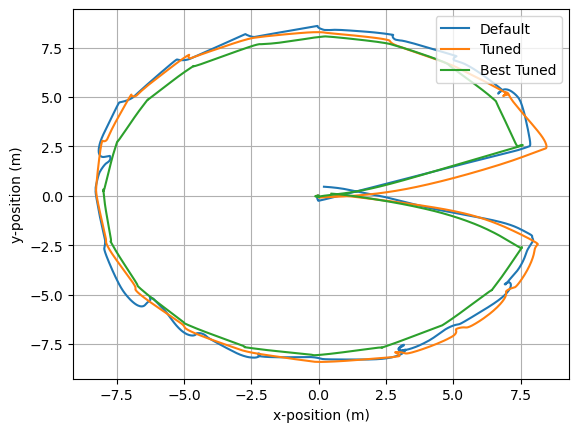

In [48]:
#plt.plot(x_true, y_true)
plt.xlabel("x-position (m)")
plt.ylabel("y-position (m)")
#plt.title("Trajectory Comparison w/ Parameters")

plt.plot(crs_default_x, crs_default_y)
plt.plot(crs_tuned_x, crs_tuned_y)
plt.plot(crs_best_tuned_x, crs_best_tuned_y)
plt.legend(['Default', 'Tuned', 'Best Tuned'], loc=1)
plt.grid()
plt.show()

In [39]:
#collect fitness for throttlePID
print("fitness for throttlePID: {}".format(zpos_fitness))
#collect fitness for yawPID
print("fitness for yawPID: {}".format(yaw_fitness))
#collect fitness for rollPID
print("fitness for rollPID: {}".format(roll_fitness))
#collect fitness for pitchPID
print("fitness for pitchPID: {}".format(pitch_fitness))
#collect combined fitness for pitchPID, xposPID, yposPID
print("fitness for forward mvmt PIDs: {}".format(trajMSE))
#collect fitness for xposPID
print("fitness for xposPID: {}".format(x_pos_fitness))
#collect fitness for yposPID
print("fitness for yposPID: {}".format(y_pos_fitness))
particle_fitness = zpos_fitness + yaw_fitness + trajMSE + roll_fitness + pitch_fitness
print("particle fitness: {}".format(particle_fitness))

fitness for throttlePID: 2.2470718061625217
fitness for yawPID: 2.741766825112528
fitness for rollPID: 0.4218553200928721
fitness for pitchPID: 0.7416722831283664
fitness for forward mvmt PIDs: 4.35976089574858
fitness for xposPID: 6.603380928279563
fitness for yposPID: 2.697154228687702
particle fitness: 10.512127130244869
